# Contents
### Import Data
### Clean Data
### Correlation Matrix (Heatmap)
### Scatterplot
### Categorical Plot
### Questions
### Hypothesis

## Import Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
%matplotlib inline

In [4]:
#create shortcut
path=r'/Users/coley/Desktop/Data Analyst School/Achievement 6'

In [5]:
#import data
df=pd.read_csv(os.path.join(path,'data.csv'))

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14,15,16,17,19,20,23,24,25,26,27,29,30,31,34,35,36,38,39,43,44,45,46,47,48,50,51,52,54,55,56,63,64,65,66,72,76,78,79,81,82,83,84,85,86,87,88,89,90,93,94,96,97,99,100,101,102,104,106,109,112,113,116,117,122,123,126,127,128,129,130,132,134,138,139,140,143,145,146,148,151,156,157,159,160,161,162,163) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Clean Data

In [6]:
df.shape

(16309, 164)

In [7]:
df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe'],
      dtype='object', length=164)

In [8]:
df.dtypes

ID              int64
Title          object
Year            int64
Age            object
IMDb          float64
               ...   
Vietnam        object
Yemen          object
Yugoslavia     object
Zambia         object
Zimbabwe       object
Length: 164, dtype: object

In [9]:
df.head()

ID                           Title  Year  Age  IMDb  Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             0.87   
1   2                      The Matrix  1999  18+   8.7             0.87   
2   3          Avengers: Infinity War  2018  13+   8.5             0.84   
3   4              Back to the Future  1985   7+   8.5             0.96   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             0.97   

   Netflix  Hulu  Prime Video  Disney+  ...  United Kingdom  United States  \
0        1     0            0        0  ...  United Kingdom  United States   
1        1     0            0        0  ...             NaN  United States   
2        1     0            0        0  ...             NaN  United States   
3        1     0            0        0  ...             NaN  United States   
4        1     0            1        0  ...             NaN            NaN   

  Uruguay  Vanuatu Venezuela Vietnam Yemen Yugoslavia Zambia Zimbabwe  
0     NaN      NaN       NaN     NaN   NaN        NaN    NaN      NaN  
1     NaN      NaN       NaN     NaN   NaN        NaN    NaN      NaN  
2     NaN      NaN       NaN     NaN   NaN        NaN    NaN      NaN  
3     NaN      NaN       NaN     NaN   NaN        NaN    NaN      NaN  
4     NaN      NaN       NaN     NaN   NaN        NaN    NaN      NaN  

[5 rows x 164 columns]

In [10]:
#create subset excluding ID
sub=df[['Year','IMDb','Rotten Tomatoes','Netflix','Hulu','Prime Video','Disney+','Runtime']]

## Correlation Matrix (Heatmap)

In [11]:
#create correlation matrix
sub.corr()

Year      IMDb  Rotten Tomatoes   Netflix      Hulu  \
Year             1.000000 -0.023947        -0.058511  0.256533  0.101088   
IMDb            -0.023947  1.000000         0.616882  0.136748  0.043012   
Rotten Tomatoes -0.058511  0.616882         1.000000  0.016317  0.021541   
Netflix          0.256533  0.136748         0.016317  1.000000 -0.107686   
Hulu             0.101088  0.043012         0.021541 -0.107686  1.000000   
Prime Video     -0.252162 -0.165701        -0.049122 -0.751231 -0.259368   
Disney+         -0.045136  0.076699        -0.011313 -0.088714 -0.035042   
Runtime          0.085637  0.091620         0.002852  0.104089  0.034372   

                 Prime Video   Disney+   Runtime  
Year               -0.252162 -0.045136  0.085637  
IMDb               -0.165701  0.076699  0.091620  
Rotten Tomatoes    -0.049122 -0.011313  0.002852  
Netflix            -0.751231 -0.088714  0.104089  
Hulu               -0.259368 -0.035042  0.034372  
Prime Video         1.000000 -0.304309 -0.071983  
Disney+            -0.304309  1.000000 -0.019010  
Runtime            -0.071983 -0.019010  1.000000

Text(0.5, 1.0, 'Correlation Matrix')

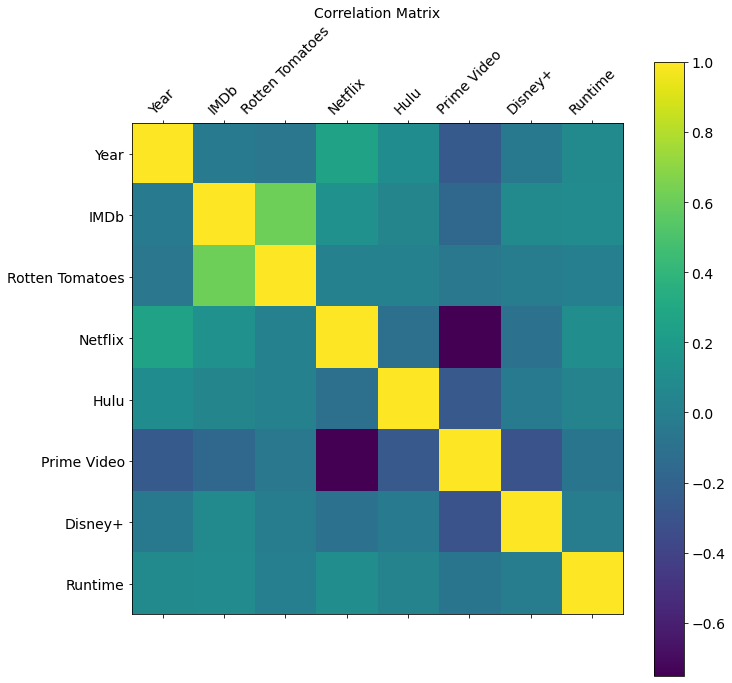

In [12]:
#create correlation heatmap
f = plt.figure(figsize=(11, 11))
plt.matshow(sub.corr(), fignum=f.number)
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45)
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

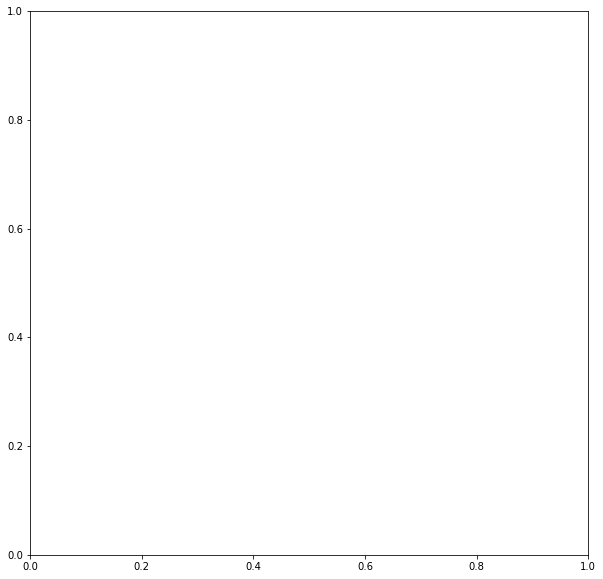

In [13]:
#create subplot
f,ax = plt.subplots(figsize=(10,10))

In [14]:
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

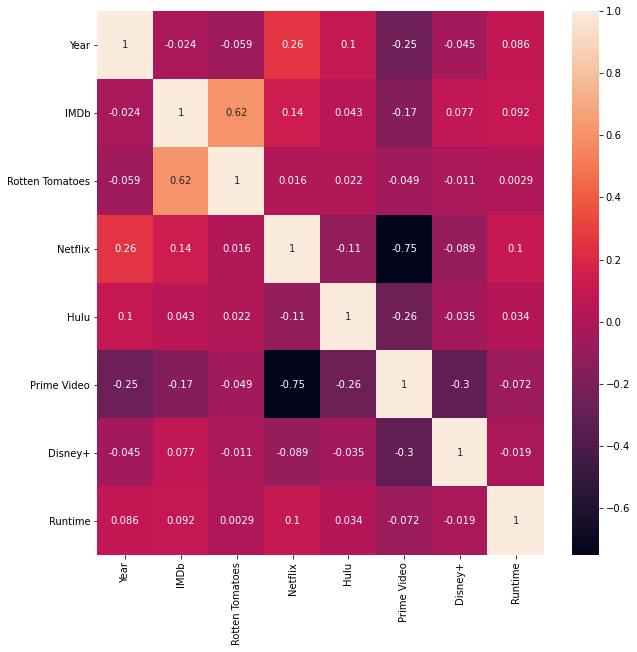

In [15]:
corr.figure

0.5–1.0: strong relationship:
        IMDb rating with Rotten Tomatoes Rating have strong positive relationship
0.3–0.5: moderate relationship:
        no variables seem to have a moderate relationship in either postivie or negative directions
0.1–0.3: weak relationship:
        all other variables other than IMDb and Rotten Tomatoes have weak relationships in both postive and negative direction

## Scatterplot

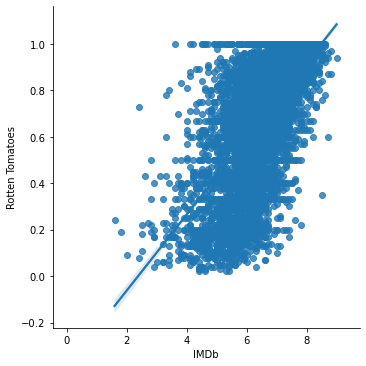

In [16]:
#create scatterplot for strongest correlations
sns.lmplot(x = 'IMDb', y = 'Rotten Tomatoes', data = sub)

Above scatterplot shows a postive correlation between Rotten Tomatoes and IMBd ratings - the higher Rotten Tomatoes rating is the higher IMDb rating is - this shows that the movies were mostly rated equally by two different rating systems

## Pair Plot

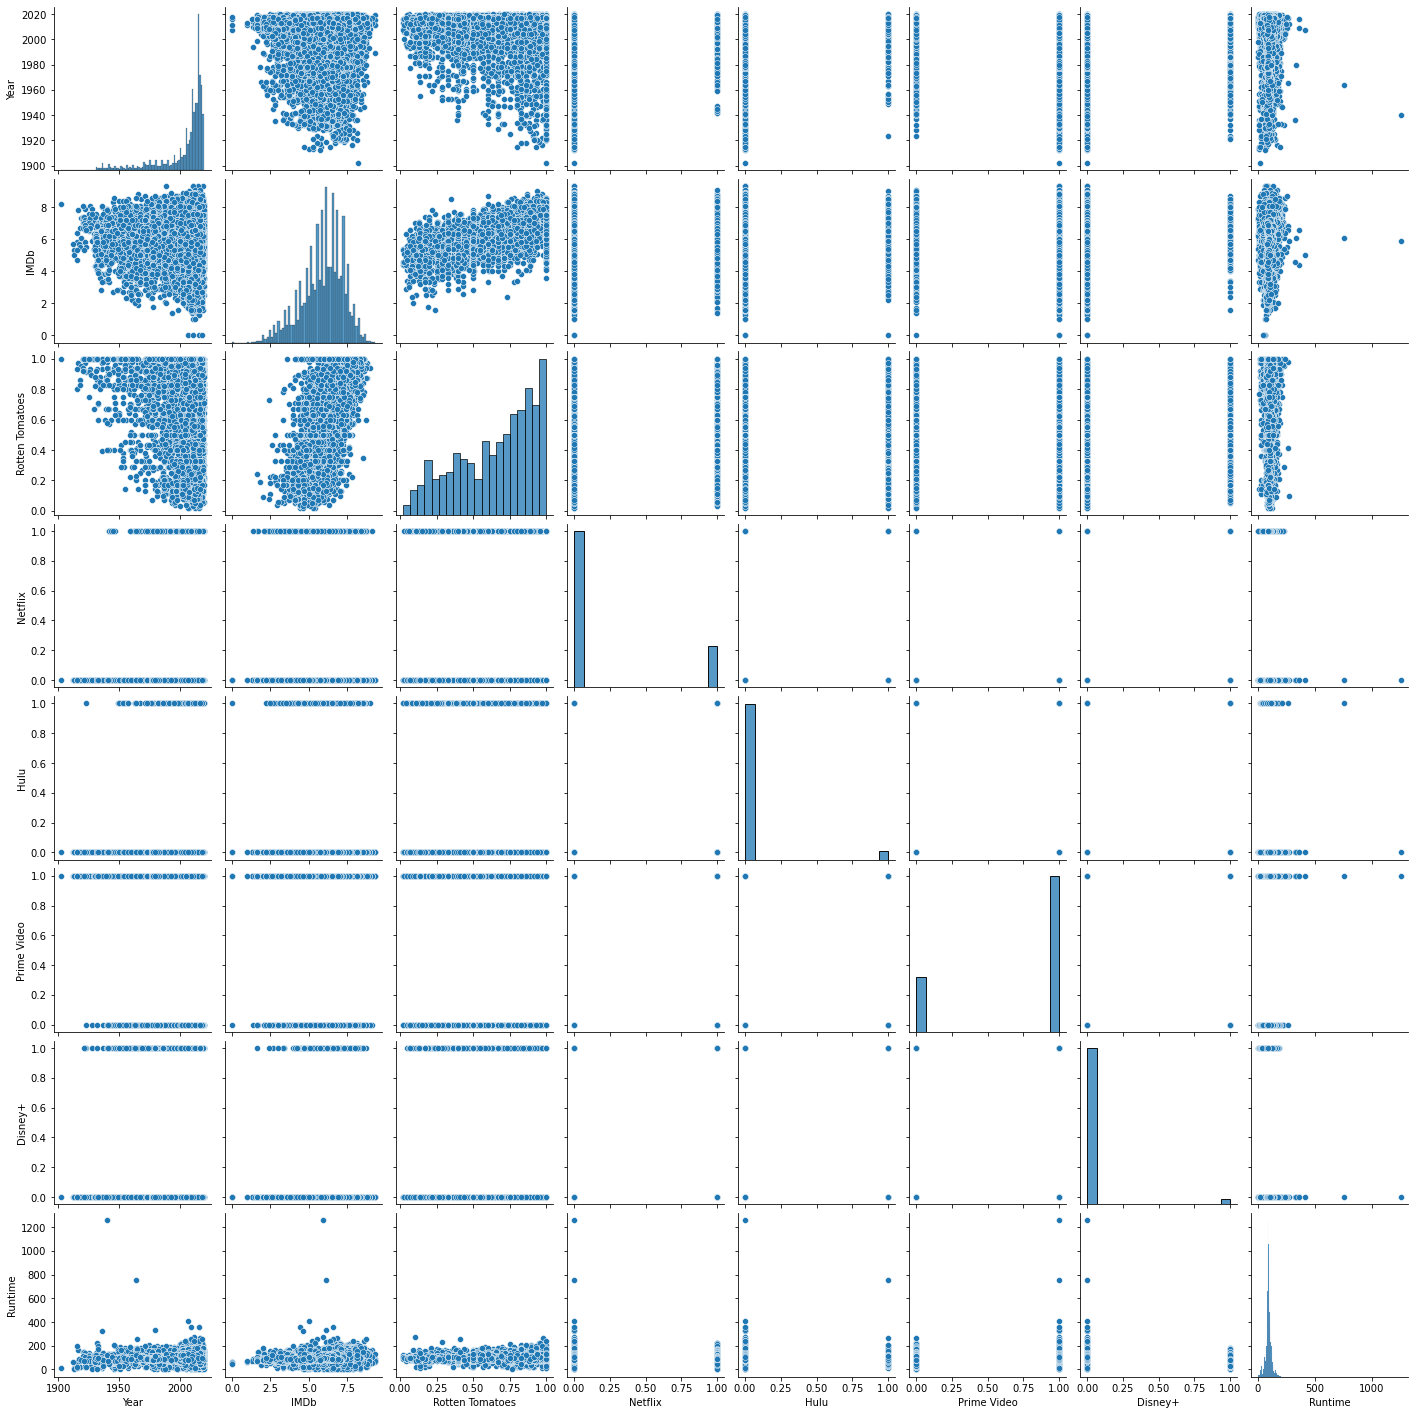

In [17]:
#create pair plot
g = sns.pairplot(sub)

the year has more of a correlation with Rotten Tomatoes rating compared to how the year and IMDb correlate - will want to look more at the years on each streaming service, there doesn't seem to be much correclation (since its only 0s and 1s for no or yes on the streaming services) but some services may have more range in year of movies streaming compared to others

## Categorical Plot

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Density'>

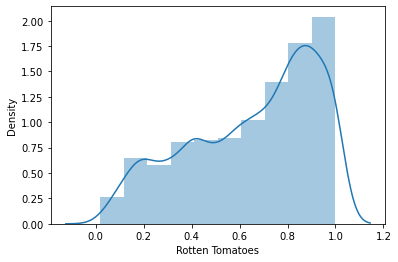

In [18]:
#create histograph for reference on category ranges
sns.distplot(sub['Rotten Tomatoes'], bins = 10)

In [19]:
df.loc[df['Rotten Tomatoes'] < 0.5, 'Rotten Tomatoes Rating'] = 'Low Rating'

In [20]:
df.loc[(df['Rotten Tomatoes'] >= 0.5) & (df['Rotten Tomatoes'] < 0.7), 'Rotten Tomatoes Rating'] = 'Average Rating'

In [21]:
df.loc[df['Rotten Tomatoes'] >= 0.7, 'Rotten Tomatoes Rating'] = 'High Rating'

In [22]:
df['Rotten Tomatoes Rating'].value_counts(dropna = False)

NaN               11170
High Rating        2681
Low Rating         1437
Average Rating     1021
Name: Rotten Tomatoes Rating, dtype: int64

In [23]:
df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+',
       ...
       'United States', 'Uruguay', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen',
       'Yugoslavia', 'Zambia', 'Zimbabwe', 'Rotten Tomatoes Rating'],
      dtype='object', length=165)

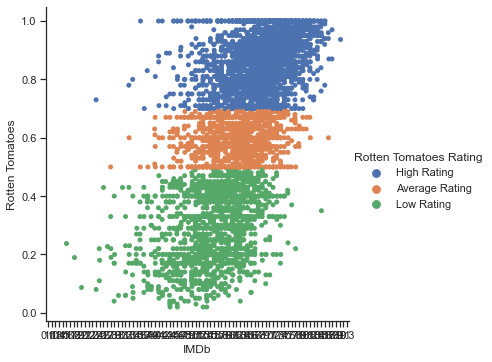

In [24]:
#create categorical plot iusing Rotten Tomatoes Rating column
sns.set(style="ticks")
g = sns.catplot(x="IMDb", y="Rotten Tomatoes", hue="Rotten Tomatoes Rating", data=df)

shows that some movies have a low Rotten Tomatoes rating but a high IMDb rating but most low IMDb ratings are also low Rotten Tomatoes rating

## Questions

### Original questions: 
### Is there a streaming service that offers the most movies?
##### Will still need to look into more
### Is it worth to be a customer for more than one streaming service?
##### WIll still need to look into more
### Are there movies on multiple streaming services?
##### This does show that there are many movies offered on all four streaming services but will need to look more into to see exact numbers
### What countries offer the most movies per streaming service?
##### Will need to look into
### What movies are offered to the most countries?
##### Will need to look into

### Added Questions:
### Does rating reflect how many streaming services a certain movie is placed on?
### Higher rating is on more streaming services?

## Hypothesis

### Higher ratings allow movie to be streamed on all services